In [1]:
import numpy as np
# import time
import pandas as pd
# from datetime import datetime
from matplotlib import pyplot as plt

Given a dataset of points in $\mathbb{R}^2$, $(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$ with $x_1<x_2<...<x_n$, our goal is to fit a straight line $l(x) = ax + b$ passing thru these points.
Ideally we would want the following equalities to yield:
$$y_1=ax_1+b+\varepsilon_1$$
$$y_2=ax_2+b+\varepsilon_2$$
$$\vdots$$
$$y_n=ax_1+b+\varepsilon_n,$$
for neglegible errors $\varepsilon_1,...\varepsilon_n\in\mathbb{R}$. So this can be translated into considering the function $\Phi\colon \mathbb{R}^2\to\mathbb{R}$ given by:
$$\Phi(a,b)=\sum_{i=1}^n\left[y_i-(ax_i+b)\right]^2,$$
which is the sum of the errors squared, and the objective is to find the arguments that minimize the value of the "total" error.
For that, we will consider the stationary points: $\nabla \Phi(a,b)= 0$.
$$\frac{\partial \Phi}{\partial a}(a,b)=0 \iff \sum_{i=1}^n2\left[y_i-(ax_i+b)\right](-x_i)=0.$$
Dividing both sides by $-2$:
$$\sum_{i=1}^n\left[x_iy_i-ax_i^2-bx_i\right]=0\iff a\sum_{i=1}^n x_i^2 + b\sum_{i=1}^n x_i = \sum_{i=1}^n x_iy_i.$$
For the $b$ component:
$$\frac{\partial \Phi}{\partial b}(a,b)=0 \iff \sum_{i=1}^n2\left[y_i-(ax_i+b)\right](-1)=0.$$
Dividing once more by $-2$ both sides, yields:
$$\sum_{i=1}^n[y_i-ax_i-b]=0\iff a\sum_{i=1}^n x_i + bn = \sum_{i=1}^n y_i.$$
Therefore:
$$\nabla\Phi(a,b)= 0\iff \begin{bmatrix}\sum_{i=1}^nx_i^2&\sum_{i=1}^nx_i\\[0.5em]\sum_{i=1}^nx_i&n\end{bmatrix}   \begin{bmatrix}a\\b\end{bmatrix}=\begin{bmatrix}\sum_{i=1}^nx_iy_i\\[0.5em]\sum_{i=1}^ny_i\end{bmatrix}.$$
So we arrived at a system of linear equations $AX=B$. To show that $\det A\ne 0$, it is sufficient to use the Cauchy-Schwarz inequality on $(x_1,...,x_n)$ and $(1,...,1)$ with underlying canonical inner product, that is, given $x = (x_1,...,x_n)$ and $y=(y_1,...,y_n)$, one has $$x\cdot y:= \sum_{i=1}^nx_iy_i.$$ Indeed, taking $y=(1,...,1)$ and applying the Cauchy-Schwarz inequality, it follows that $$\left|\sum_{i=1}^nx_i\cdot 1\right|^2\le \left(\sum_{i=1}^nx_i^2\right)\left(\sum_{i=1}^n1^2\right)\iff \underbrace{n\left(\sum_{i=1}^nx_i^2\right)-\left(\sum_{i=1}^nx_i\right)^2}_{\det A}\ge 0,$$
and the equality is attained when $(x_1,...,x_n)$ and $(1,...,1)$ are colinear. Therefore $\det A\ne 0$.

In [2]:
np.random.seed(2)
x = np.linspace(1, 10, 50) # arbitrary x components
mu = 0
sigma = 2
n = 50
l = 2 * x + 1 # some line
epsilon = np.random.normal(mu, sigma, n)
y = l + epsilon # arbitrary y components

In [3]:
y_lower = l - sigma # lower bound of a region
y_upper = l + sigma # upper bound of a region

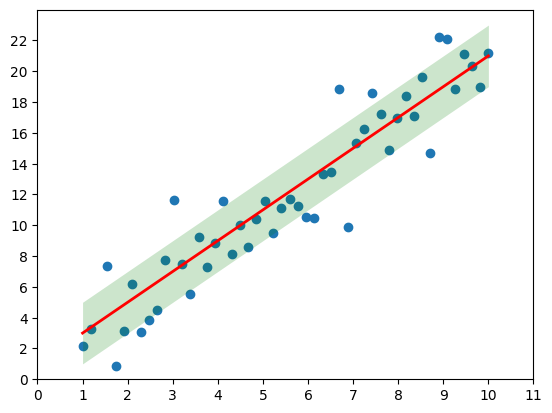

In [4]:
fig, ax = plt.subplots()

ax.scatter(x, y)
ax.set(xlim=(0, 11), xticks=np.arange(0, 12, 1),
       ylim=(0, 24), yticks=np.arange(0, 23, 2))

ax.fill_between(x, y_lower, y_upper, alpha=0.2, linewidth=0, color='g')

ax.plot(x, l, linewidth=2.0, color='r')

plt.savefig('figura.pdf')